# Import tất cả các thư viện dùng trong bài tập.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc File 

In [3]:
Online=pd.read_csv("./Online_Retail.csv",encoding = 'latin1')

# In ra 5 dòng đầu tiên của dữ liệu

In [4]:
Online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# In ra thông tin cụ thể của mỗi cột

In [5]:
Online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Kiểm tra xem có bao nhiêu cột nan và số lượng nan trong mỗi cột

In [6]:
Online.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# In một vài ví dụ về cột nan 

In [7]:
Online[Online['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom


# In thông tin một vài dòng có Quantity không âm

In [8]:
Online[Online['Quantity']>0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# In thông tin một vài dòng có Price không âm

In [9]:
Online[Online['UnitPrice']>0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# In thông tin của khách hàng ở United Kingdom và có Quantity lớn nhất

In [10]:
tam=Online[Online['Country']=='United Kingdom']
bien=Online[Online['Country']=='United Kingdom']['Quantity'].max()
tam[tam['Quantity']==bien]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom


# In thông tin của khách hàng ở Netherlands và có UnitPrice cao nhất

In [11]:
tam=Online[(Online['Country']=='Netherlands')] 
bien=Online[(Online['Country']=='Netherlands')]['UnitPrice'].max()
tam[tam['UnitPrice']==bien]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
304662,C563593,D,Discount,-1,8/18/11 6:13,206.4,14646.0,Netherlands


# In ra năm có sales cao nhất

In [12]:
tam=Online['InvoiceDate']
#.apply(lambda exp: exp[4:]=='11')]
#len(ecom[ecom['CC Exp Date'].apply(lambda exp: exp[3:]=='25')].index)

#Dùng này để tách và lấy ra năm
daysotam=tam.apply(lambda dayso: dayso.split('/')[2])
daysotam1=daysotam.apply(lambda dayso: dayso.split()[0])

# add thêm 1 cột mới vào bảng Online côt đó là năm.
Online['daysotam']=daysotam1

In [13]:
# Groupby theo daysotam(nam) tính tổng UnitPrice của mỗi năm.
tam=Online.groupby('daysotam')['UnitPrice'].sum()
# dùng một biến để tìm ra được năm có giá trị cao nhất
bien=tam.max()
tam1=tam.reset_index()
# Tìm và in ra năm
tam1[tam1['UnitPrice']==bien]['daysotam']

1    11
Name: daysotam, dtype: object

# Hiển thị danh sách top 10 sản phẩm bán chạy nhất

In [22]:
tam=Online['Description'].value_counts()
tam.head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

# Vẽ biểu đồ Histogram với 10 quốc gia có Quantity cao nhất trừ UK

,Country,Quantity
24,Netherlands,200128
10,EIRE,142637
14,Germany,117448
13,France,110480
0,Australia,83653
32,Sweden,35637
33,Switzerland,30325
31,Spain,26824
20,Japan,25218
3,Belgium,23152


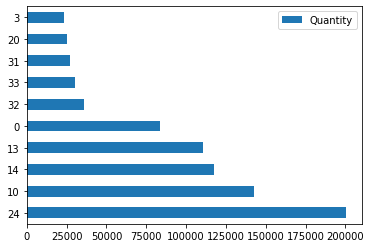

In [56]:
tam=Online[Online['Country']!='United Kingdom'].groupby('Country').sum()
tam1=tam.reset_index()
tam2=tam1[['Country','Quantity']]
tam3=tam2.sort_values(['Quantity', 'Country'], ascending=False)
tam4=tam3.head(10)
tam4.plot(kind='barh')
#plt.show()